Problem Statement 1:
Amit wants to purchase office space. He does a detailed survey of the offices and corporate complexes in the area and tries to
quantify a lot of factors, such as the distance of the offices from residential and 
other commercial areas, schools, and workplaces; the reputation of the construction companies, and builders involved in 
constructing the apartments; the distance of the offices from highways, freeways, and important roads; 
the facilities around the office space and so on.Each of these factories was quantified, normalized, and mapped 
to values on a scale of 0 to 1.
Amit then makes a table. Each row in the table corresponds to Amit's observations for a particular house. 
If Amit has observed and noted F features, the row contains F values separated by a single space,
followed by the office-space price in dollars/square-foot. If Amit makes observations for H houses,
his observation table has (F+1) columns and H rows, and a total of (F+1) * H entries.
Amit does several such surveys and provides you with the tabulated data. At the end of these tables are some rows 
which have just F columns (the price per square foot is missing). Your task is to predict these prices.
F can be any integer number between 1 and 5, both inclusive.
There is one important observation that Amit has made. The prices per square foot, are (approximately)
a polynomial function of the features in the observation table. This polynomial always has an order less than 4


Input values in the dataset:
The first line contains F and N. Over here, F is the number of observed features.
N is the number of rows for which features as well as price per square foot.


In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
df=pd.read_csv("C:\\Users\\prati\\Downloads\\data (1).csv")

In [14]:
df.head(10)

,F,N,Prprice per square foot
0,0.44,0.68,511.14
1,0.99,0.23,717.10
2,0.84,0.29,607.91
3,0.28,0.45,270.40
4,0.07,0.83,289.88
5,0.66,0.80,830.85
6,0.73,0.92,1038.09
7,0.57,0.43,455.19
8,0.43,0.89,640.17
9,0.27,0.95,511.06


In [15]:
df.shape

(100, 3)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   F                        100 non-null    float64
 1   N                        100 non-null    float64
 2   Prprice per square foot  100 non-null    float64
dtypes: float64(3)
memory usage: 2.5 KB


In [17]:
df.describe()

,F,N,Prprice per square foot
count,100.000000,100.000000,100.000000
mean,0.550300,0.501700,554.214600
std,0.293841,0.307124,347.312796
min,0.010000,0.000000,42.080000
25%,0.300000,0.230000,278.172500
50%,0.570000,0.485000,514.285000
75%,0.822500,0.760000,751.752500
max,1.000000,0.990000,1563.820000


In [18]:
df.isnull().sum()

F                          0
N                          0
Prprice per square foot    0
dtype: int64

In [21]:
from sklearn.preprocessing import StandardScaler

In [22]:
sclr = StandardScaler()
scaled = sclr.fit_transform(df)

In [23]:
df1 = pd.DataFrame(scaled)

In [24]:
df1.head()

,0,1,2
0,-0.377265,0.583471,-0.124647
1,1.503928,-0.889115,0.471350
2,0.990875,-0.692770,0.155381
3,-0.924521,-0.169184,-0.821290
4,-1.642794,1.074333,-0.764919


In [25]:
x = df1.iloc[:,:2].values
y = df1.iloc[:,-1].values

In [26]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state = 0, test_size = 0.2)

In [27]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((80, 2), (20, 2), (80,), (20,))

In [28]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [29]:
y_pred = reg.predict(x_test)

In [30]:
y_pred

array([-0.37075684, -1.43353291,  0.34046458, -1.39946387,  0.29374307,
       -0.9160151 ,  0.10036309,  0.05071943,  0.3560392 ,  0.41882197,
        0.57018377,  1.20807714,  1.44688172,  1.72705485, -0.08149832,
       -0.44765433,  1.25058194, -1.26059389,  0.97430189,  0.43504622])

Text(0.5, 1.0, 'Actual vs Predicted')

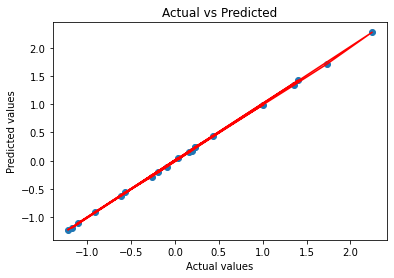

In [41]:
plt.scatter(y_pred,y_test)
plt.plot(y_pred,y_test,color = 'red')
plt.xlabel('Actual values')
plt.ylabel("Predicted values")
plt.title('Actual vs Predicted')

In [32]:
reg.predict([[0.44,0.68]])

array([0.72649571])

In [33]:
reg.predict([[0.43,0.06]])

array([0.35942899])

In [34]:
reg.predict([[0.90,0.94]])

array([1.21985185])

In [35]:
from sklearn.preprocessing import PolynomialFeatures

preg = PolynomialFeatures(degree = 4)

x_poly = preg.fit_transform(x_train)

lin_reg2 = LinearRegression()
lin_reg2.fit(x_poly, y_train)

LinearRegression()

In [36]:
y_pred = lin_reg2.predict(preg.fit_transform(x_test))

y_pred

array([-0.5671409 , -1.22218853,  0.15876604, -1.17277595,  0.0372966 ,
       -0.91333257, -0.09478473, -0.19561572,  0.19346764,  0.22877167,
        0.4313899 ,  1.35730927,  1.72781526,  2.24761971, -0.26591288,
       -0.62054206,  1.4057029 , -1.11086416,  1.00438286,  0.23331786])

In [37]:
from sklearn import metrics

r2 = metrics.r2_score(y_test,y_pred)

mae = metrics.mean_absolute_error(y_test,y_pred)

mse = metrics.mean_squared_error(y_test,y_pred)

rmse = np.sqrt(mse)



In [38]:
print("Coeff of Determination ", r2)
print("Mean absolute error ",mae)
print("Mean squared error",mse)
print('root mean squared error',rmse)

Coeff of Determination  0.9997845266352733
Mean absolute error  0.012228809399896661
Mean squared error 0.00020067826345722666
root mean squared error 0.014166095561488588


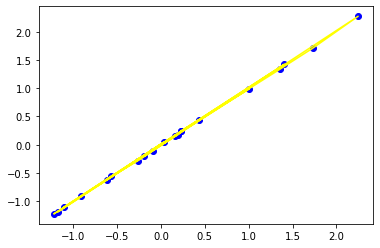

In [40]:
plt.scatter(y_pred,y_test,color='blue')
plt.plot(y_pred,y_test,color='yellow')

## Conclussion :-
We plotted graph from that I concluded polynomial linear reg is suitable for this problem, and I also concluded that polynomial gives better result compare to multiple linear reg¶